# ARMA model
### Kirill Zakharov
#### 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.optimize import minimize
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('lynx.csv', index_col='Year', parse_dates=True)
data.index = pd.DatetimeIndex(data.index, freq='YS')
data.head(4)

,Annual number of lynx trapped
Year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871


In [43]:
date1 = data.index[-1] + pd.DateOffset(years=1)
date2 = date1 + pd.DateOffset(years=9)
dates = pd.date_range(date1, date2, freq='YS')
dates

DatetimeIndex(['1935-01-01', '1936-01-01', '1937-01-01', '1938-01-01',
               '1939-01-01', '1940-01-01', '1941-01-01', '1942-01-01',
               '1943-01-01', '1944-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [44]:
ar1 = data.values
ar2 = data.values

In [45]:
n = len(data.values) - 2 
y = data.values[2:].reshape(n)

In [46]:
len(data.values[2:].reshape(n))

112

In [47]:
ar1 = np.insert(ar1, 0, -1)
ar2 = np.insert(ar2, 0, -1)
ar2 = np.insert(ar2, 1, -1)

In [48]:
matrix = np.array([ar1[2:-1], ar2[2:-2], np.ones(n)])
# matrix = np.append(matrix, ar1[2:-1])
# matrix = np.append(matrix, ar2[2:-2])
# matrix = np.append(matrix, np.ones(n))

In [49]:
def fun(x):
    return sum((y - np.dot(matrix.T, x))**2)

init = np.repeat(0.5, 3)
opt1 = minimize(fun, init)
opt1

      fun: 86987807.78020011
 hess_inv: array([[ 3.67421200e-09, -2.62886530e-09, -1.65832160e-06],
       [-2.62886530e-09,  3.67032948e-09, -1.51782333e-06],
       [-1.65832160e-06, -1.51782333e-06,  9.29948400e-03]])
      jac: array([-2.,  0.,  0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 387
      nit: 5
     njev: 75
   status: 2
  success: False
        x: array([ 1.15243030e+00, -6.06221978e-01,  7.10062281e+02])

In [50]:
# array = [(data.values)[0][0], (data.values)[1][0]]
# for i in range(2, n):
#     array.append(opt1.x[2] + opt1.x[0]*y[i-1] + opt1.x[1]*y[i-2])
    
# approx = pd.DataFrame(array, index=data.index[2:], columns=['Approximation'])    

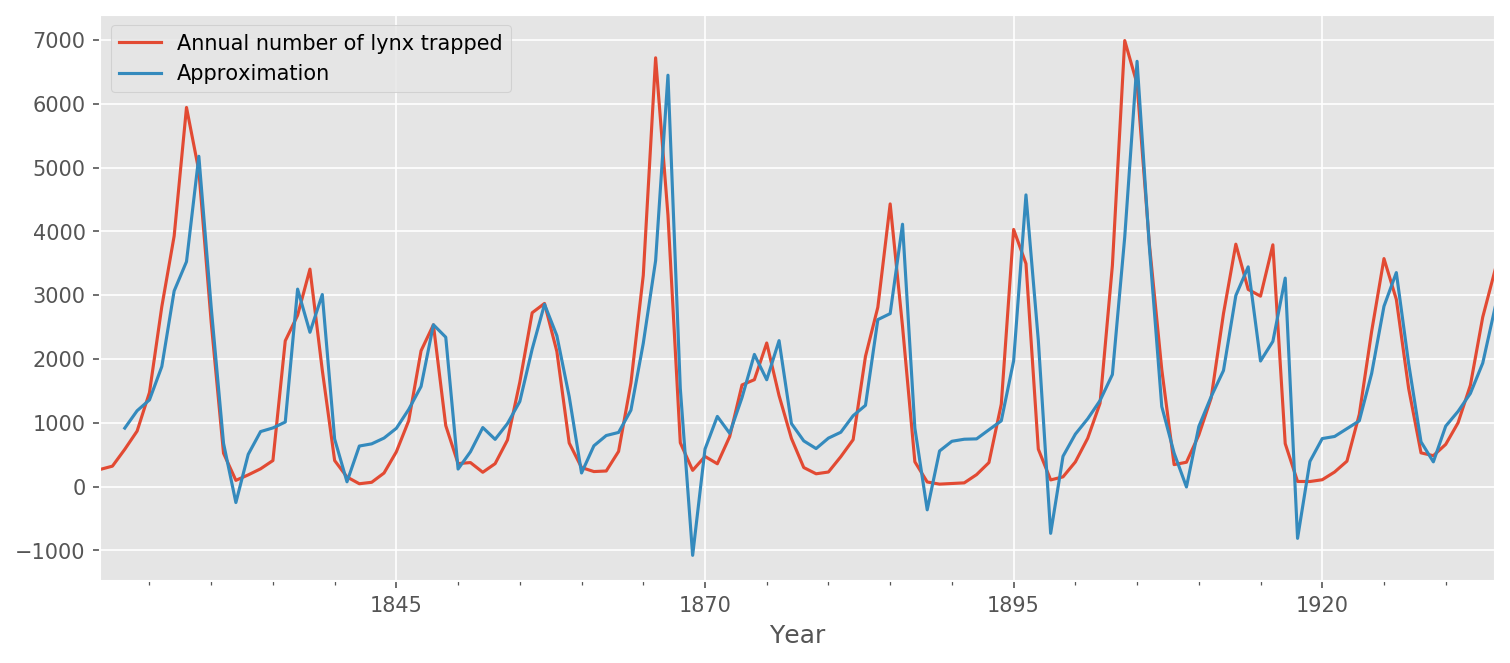

In [51]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

pred_AR = np.dot(matrix.T, opt1.x)
approx_AR = pd.DataFrame(pred_AR, index=data.index[2:], columns=['Approximation']) 

data.plot(ax=ax)
approx_AR.plot(ax=ax)
plt.legend()
plt.show()

In [52]:
len(np.ones(n-2))

110

In [53]:
eps = np.array(y - pred)
eps1 = eps
eps2 = eps
eps1 = np.insert(eps1, 0, -1)
eps2 = np.insert(eps2, 0, -1)
eps2 = np.insert(eps2, 1, -1)
matrix1 = np.array([eps1[2:-1], eps2[2:-2], np.ones(n-2)])

In [54]:
def fun1(x):
    return sum((eps[2:] - np.dot(matrix1.T, x))**2)

init = np.repeat(0.5, 3)
opt2 = minimize(fun1, init)
opt2

      fun: 84820502.45198797
 hess_inv: array([[5.78067116e-09, 1.24932001e-10, 2.12408173e-08],
       [1.24932001e-10, 5.80953790e-09, 8.57770509e-08],
       [2.12408173e-08, 8.57770509e-08, 5.48320587e-03]])
      jac: array([ 0.,  2., -1.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 370
      nit: 8
     njev: 72
   status: 2
  success: False
        x: array([-0.02091851, -0.14953684,  4.12452335])

In [55]:
# array1 = [eps[0], eps[1]]
# for i in range(2, n-2):
#     array1.append(opt2.x[2] + opt2.x[0]*eps[i-1] + opt2.x[1]*eps[i-2])
    
# approx1 = pd.DataFrame(array1, index=data.index[2:-2], columns=['Approximation'])
pred_MA = np.dot(matrix1.T, opt2.x)
approx_MA = pd.DataFrame(pred_MA, index=data.index[4:], columns=['Approximation']) 

### Combining results

In [56]:
res_approx = pred_AR[2:] + pred_MA
res_approx = pd.DataFrame(res_approx, index=data.index[4:], columns=['Approximation'])

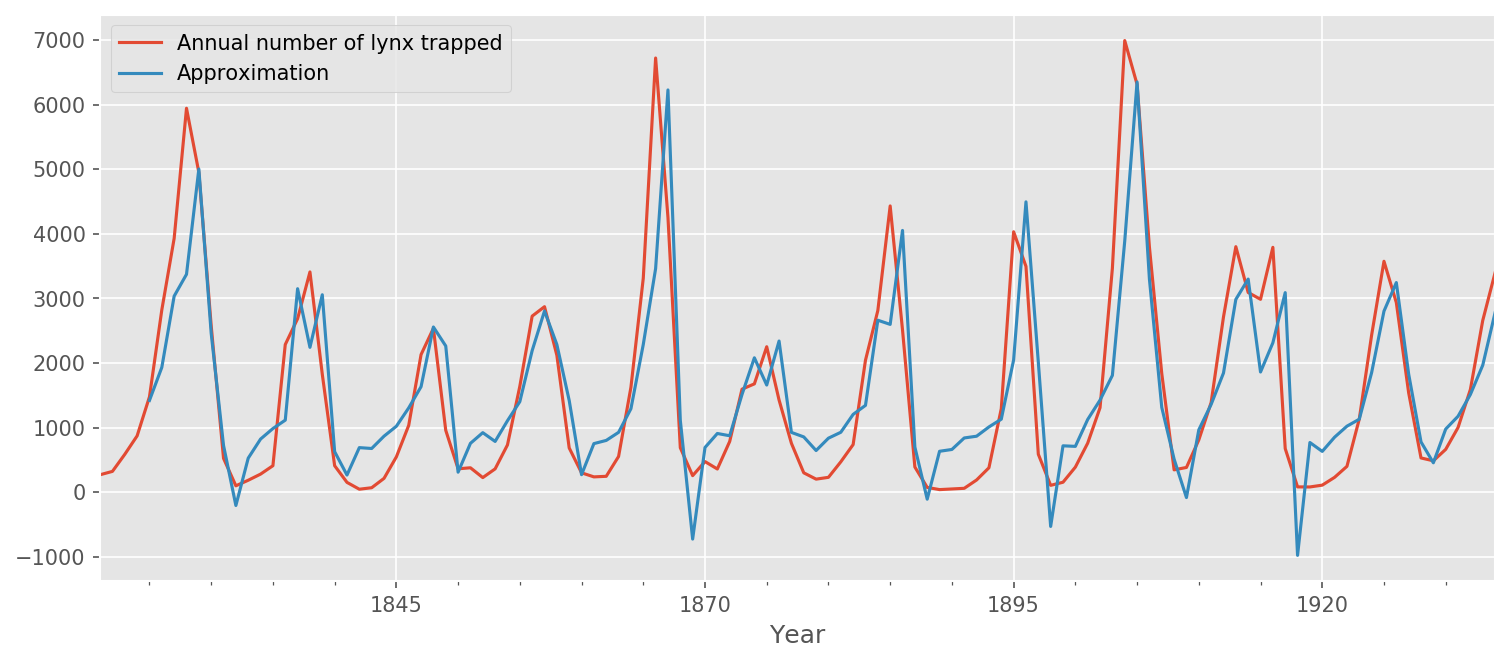

In [57]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
data.plot(ax=ax)
res_approx.plot(ax=ax)
plt.legend()
plt.show()